<a href="https://colab.research.google.com/github/RashmitVartak/AfameTech/blob/main/Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#will try to build multiple models for predicting the survival of the passenger and try deplying it on the streamlit
#Titanic prediction
#converting to tthe pickle file
#using react to build a web application
#Deploying it on the Streamlit

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/content/full.csv")

## Understanding the data


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


In [9]:
df.isnull().any(axis=0)

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
WikiId          True
Name_wiki       True
Age_wiki        True
Hometown        True
Boarded         True
Destination     True
Lifeboat        True
Body            True
Class           True
dtype: bool

In [10]:
df.shape

(1309, 21)

In [11]:
df.isna().sum().sort_values(ascending = False)

Body           1179
Cabin          1014
Lifeboat        807
Survived        418
Age             263
Age_wiki          7
WikiId            5
Destination       5
Boarded           5
Hometown          5
Name_wiki         5
Class             5
Embarked          2
Fare              1
Ticket            0
Parch             0
SibSp             0
Sex               0
Name              0
Pclass            0
PassengerId       0
dtype: int64

Here, All the columns after Index 12 are not needed thus we will remove them from the dataset and then, go ahead with preprocessing
But, as Age has many missing values , we'll be taking Age_wiki ahead for further processing of the data

## Preprocessing the data & EDA



In [12]:
df.drop('Age',axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,NaN,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


In [13]:
df = df.drop(['Name_wiki', 'WikiId','Hometown','Body','Boarded','Class','Lifeboat','Ticket','Cabin','PassengerId','Destination','Name','Age'], axis=1)

In [14]:
df.rename(columns={'Age_wiki':'Age'})

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,0.0,3,male,1,0,7.2500,S,22.0
1,1.0,1,female,1,0,71.2833,C,35.0
2,1.0,3,female,0,0,7.9250,S,26.0
3,1.0,1,female,1,0,53.1000,S,35.0
4,0.0,3,male,0,0,8.0500,S,35.0
...,...,...,...,...,...,...,...,...
1304,NaN,3,male,0,0,8.0500,S,23.0
1305,NaN,1,female,0,0,108.9000,C,39.0
1306,NaN,3,male,0,0,7.2500,S,43.0
1307,NaN,3,male,0,0,8.0500,S,34.0


In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']= le.fit_transform(df['Embarked'])
df['Embarked']

0       2
1       0
2       2
3       2
4       2
       ..
1304    2
1305    0
1306    2
1307    2
1308    0
Name: Embarked, Length: 1309, dtype: int64

In [16]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_wiki
0,0.0,3,1,1,0,7.2500,2,22.0
1,1.0,1,0,1,0,71.2833,0,35.0
2,1.0,3,0,0,0,7.9250,2,26.0
3,1.0,1,0,1,0,53.1000,2,35.0
4,0.0,3,1,0,0,8.0500,2,35.0


In [18]:
df['Age_wiki']

0       22.0
1       35.0
2       26.0
3       35.0
4       35.0
        ... 
1304    23.0
1305    39.0
1306    43.0
1307    34.0
1308     4.0
Name: Age_wiki, Length: 1309, dtype: float64

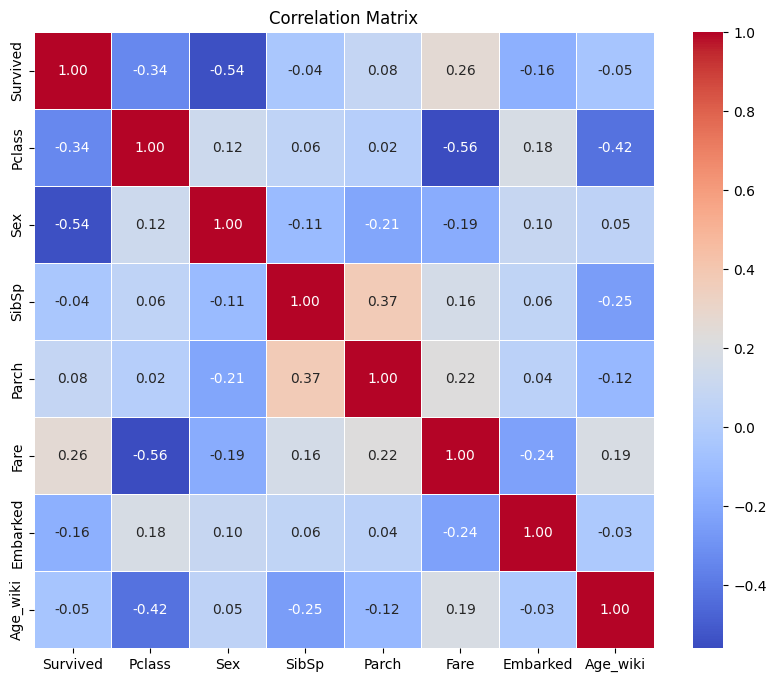

In [19]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Text(0, 0.5, 'Fare')

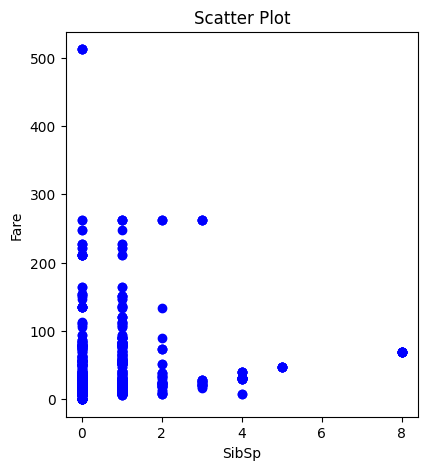

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['SibSp'], df['Fare'], color='blue', marker='o')
plt.title('Scatter Plot')
plt.xlabel('SibSp')
plt.ylabel('Fare')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615:

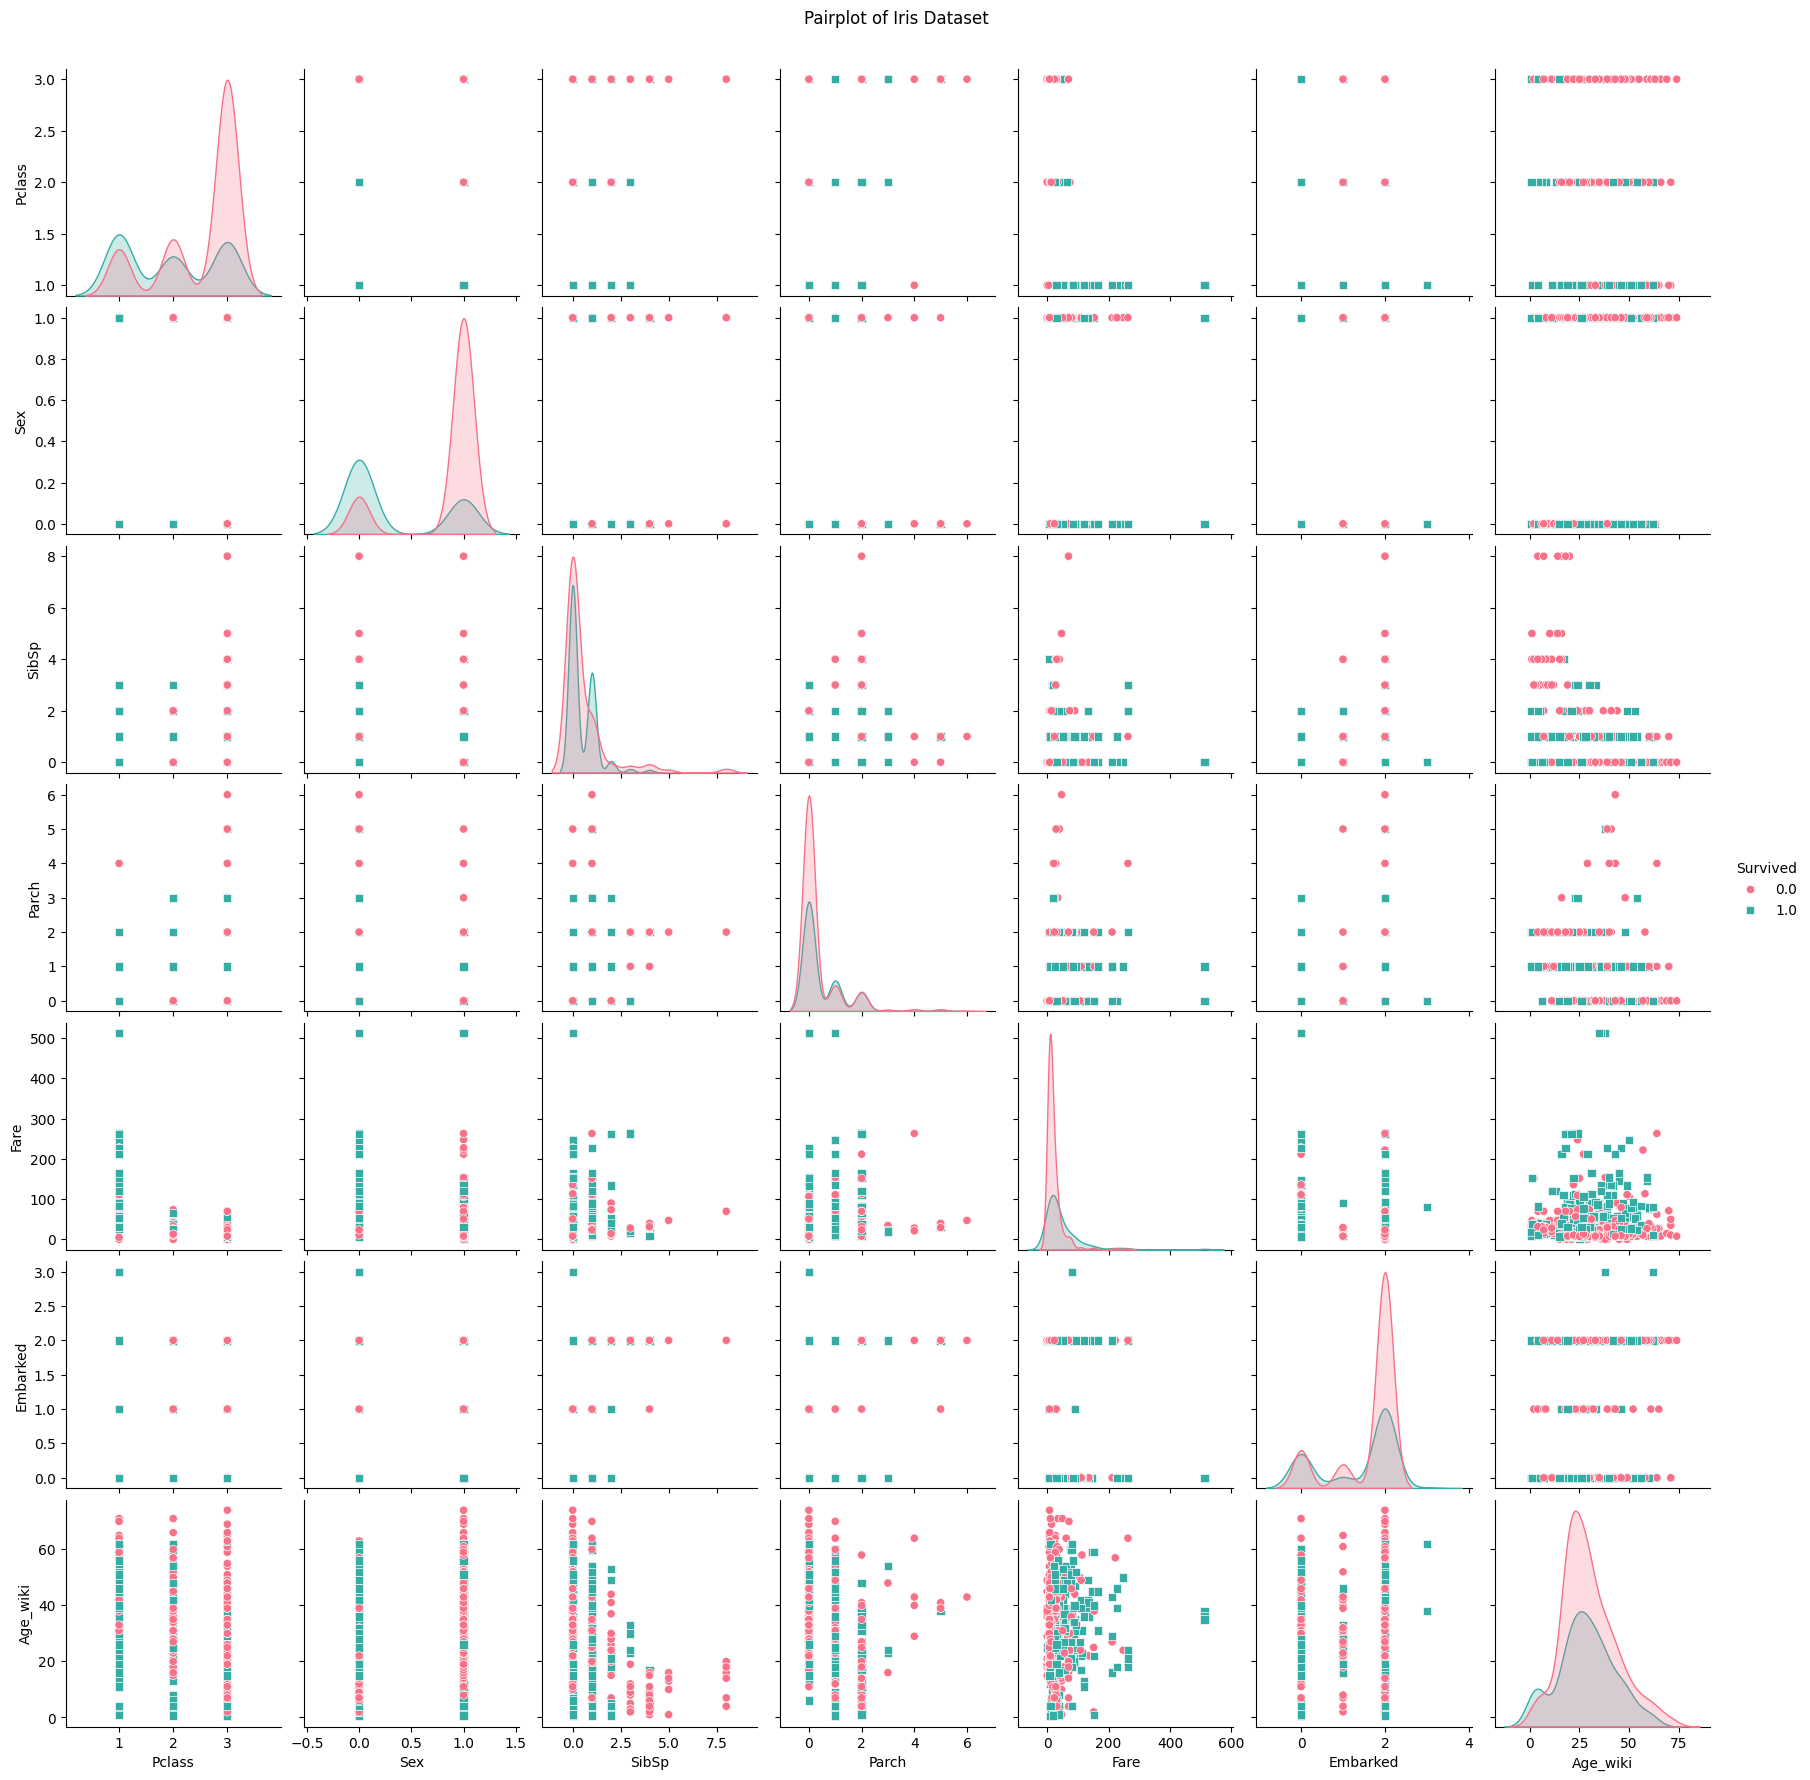

In [21]:

# Create a pairplot with customizations
pairplot = sns.pairplot(df, hue='Survived', markers=["o", "s", "D"], palette="husl", diag_kind='kde')

pairplot.fig.suptitle("Pairplot of Iris Dataset", y=1.02)

plt.show()

In [22]:
cat_data = df[['Sex','Embarked']]
num_data = df[['Survived','Pclass','SibSp','Parch', 'Fare','Age_wiki']]

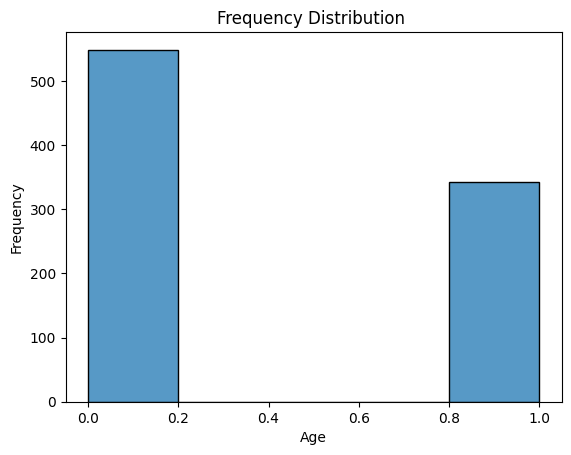

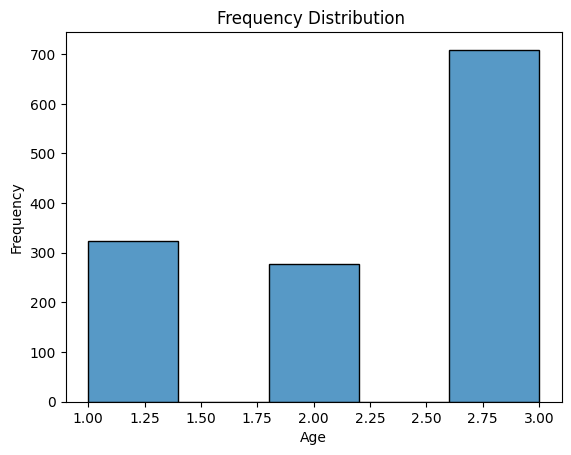

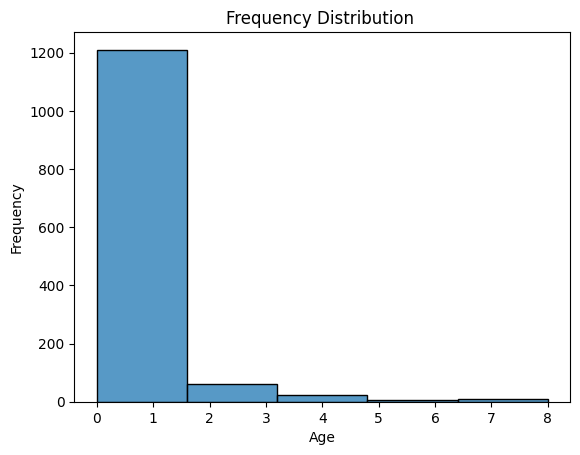

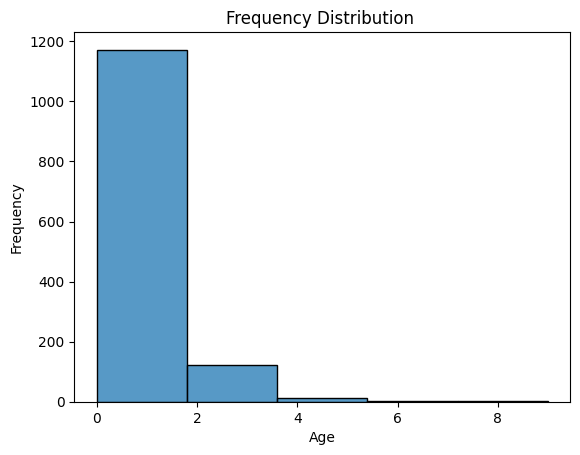

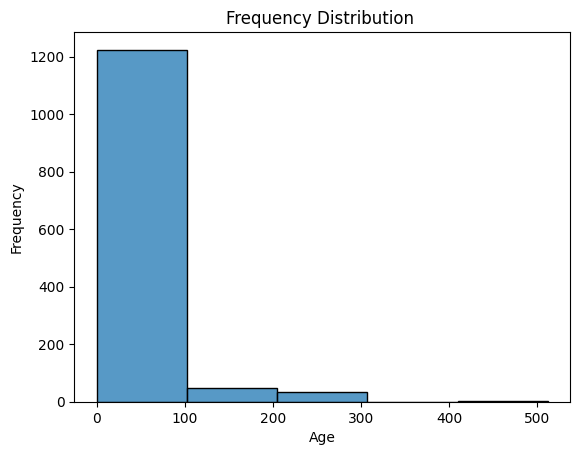

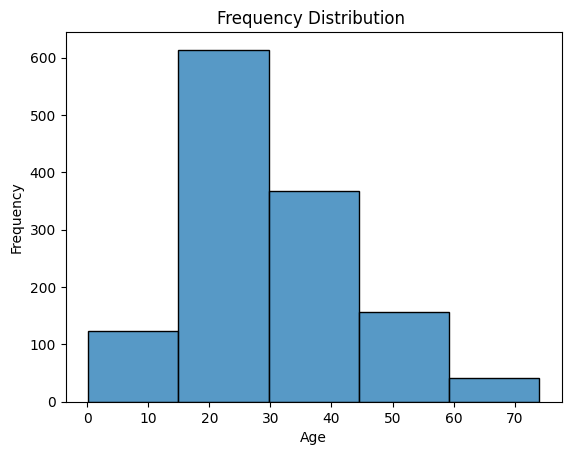

In [23]:
for i in num_data.columns:
  sns.histplot(df[i], bins=5, kde=False)
  plt.title('Frequency Distribution ')
  plt.xlabel('Age')
  plt.ylabel('Frequency')

  # Show plot
  plt.show()


          Survived    Pclass     SibSp     Parch      Fare  Age_wiki
Survived  1.000000 -0.338481 -0.035322  0.081629  0.257307 -0.049798
Pclass   -0.338481  1.000000  0.060832  0.018322 -0.558629 -0.421088
SibSp    -0.035322  0.060832  1.000000  0.373587  0.160238 -0.248726
Parch     0.081629  0.018322  0.373587  1.000000  0.221539 -0.122975
Fare      0.257307 -0.558629  0.160238  0.221539  1.000000  0.187654
Age_wiki -0.049798 -0.421088 -0.248726 -0.122975  0.187654  1.000000


<Axes: >

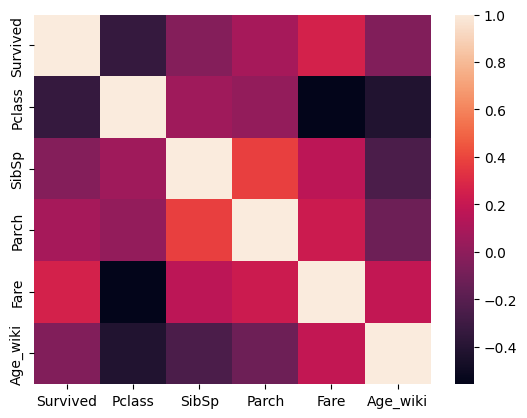

In [24]:
print(num_data.corr())
sns.heatmap(num_data.corr())

In [25]:
pd.pivot_table(num_data, index = 'Survived', values = ['Survived', 'Pclass','SibSp','Parch','Fare','Age_wiki'])

,Age_wiki,Fare,Parch,Pclass,SibSp
Survived,,,,,
0.0,29.869963,22.117887,0.329690,2.531876,0.553734
1.0,28.444780,48.395408,0.464912,1.950292,0.473684


In [26]:
df.isna().sum().sort_values(ascending = False)

Survived    418
Age_wiki      7
Fare          1
Pclass        0
Sex           0
SibSp         0
Parch         0
Embarked      0
dtype: int64

In [27]:
df.shape

(1309, 8)

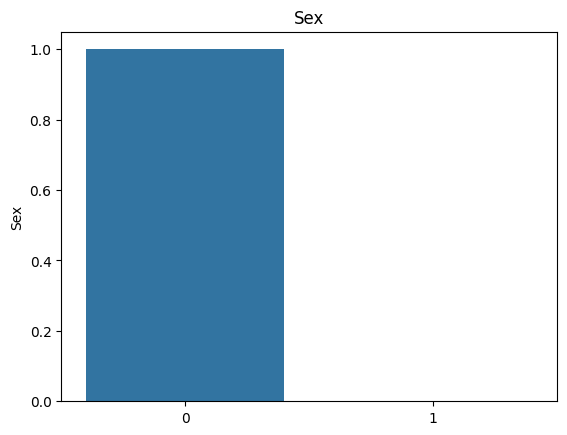

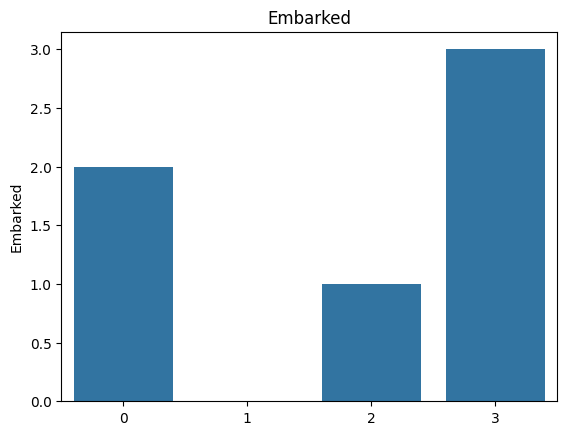

In [28]:
for i in cat_data.columns:
  sns.barplot(cat_data[i].value_counts().index).set_title(i)
  plt.show()


In [29]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_wiki
0,0.0,3,1,1,0,7.2500,2,22.0
1,1.0,1,0,1,0,71.2833,0,35.0
2,1.0,3,0,0,0,7.9250,2,26.0
3,1.0,1,0,1,0,53.1000,2,35.0
4,0.0,3,1,0,0,8.0500,2,35.0
...,...,...,...,...,...,...,...,...
1304,NaN,3,1,0,0,8.0500,2,23.0
1305,NaN,1,0,0,0,108.9000,0,39.0
1306,NaN,3,1,0,0,7.2500,2,43.0
1307,NaN,3,1,0,0,8.0500,2,34.0


## Feature Engg


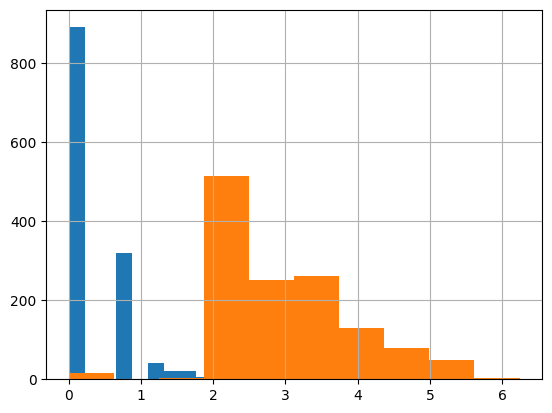

In [30]:
#impute nulls for continuous data
#all_data.Age = all_data.Age.fillna(training.Age.mean())
df.Age_wiki = df.Age_wiki.fillna(df.Age_wiki.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
df.Fare = df.Fare.fillna(df.Fare.median())

#tried log norm of sibsp (not used)
df['norm_sibsp'] = np.log(df.SibSp+1)
df['norm_sibsp'].hist()

# log norm of fare (used)
df['norm_fare'] = np.log(df.Fare+1)
df['norm_fare'].hist()

# converted fare to category for pd.get_dummies()
df.Pclass = df.Pclass.astype(str)



## Model Training

Since, we have 1/3rd of the target variable 'Survived' missing in our dataset. We'll try using Imputation

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Separate rows with and without missing target values
df_missing = df[df['Survived'].isnull()]
df_not_missing = df[df['Survived'].notnull()]

# Features and target variable
X = df_not_missing[['Pclass','SibSp','Parch','Fare','Age_wiki','Sex','Embarked']]
y = df_not_missing['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a model
model = RandomForestRegressor()
model.fit(X_train, y_train)



RandomForestRegressor()

In [33]:
# Predict missing values
X_missing = df_missing[['Pclass','SibSp','Parch','Fare','Age_wiki','Sex','Embarked']]
df_missing['Survived'] = model.predict(X_missing)

# Combine the dataframes
df_combined = pd.concat([df_not_missing, df_missing]).sort_index()

print(df_combined)


      Survived Pclass  Sex  SibSp  Parch      Fare  Embarked  Age_wiki  \
0     0.000000      3    1      1      0    7.2500         2      22.0   
1     1.000000      1    0      1      0   71.2833         0      35.0   
2     1.000000      3    0      0      0    7.9250         2      26.0   
3     1.000000      1    0      1      0   53.1000         2      35.0   
4     0.000000      3    1      0      0    8.0500         2      35.0   
...        ...    ...  ...    ...    ...       ...       ...       ...   
1304  0.004286      3    1      0      0    8.0500         2      23.0   
1305  1.000000      1    0      0      0  108.9000         0      39.0   
1306  0.010000      3    1      0      0    7.2500         2      43.0   
1307  0.000000      3    1      0      0    8.0500         2      34.0   
1308  0.830000      3    1      1      1   22.3583         0       4.0   

      norm_sibsp  norm_fare  
0       0.693147   2.110213  
1       0.693147   4.280593  
2       0.000000   2.

<ipython-input-33-4c711d4d8fdf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['Survived'] = model.predict(X_missing)


In [34]:
df_combined.isna().sum().sort_values(ascending = False)

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Age_wiki      0
norm_sibsp    0
norm_fare     0
dtype: int64

In [35]:
df_combined.isnull().any()

Survived      False
Pclass        False
Sex           False
SibSp         False
Parch         False
Fare          False
Embarked      False
Age_wiki      False
norm_sibsp    False
norm_fare     False
dtype: bool

In [36]:
df_combined.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_wiki,norm_sibsp,norm_fare
0,0.0,3,1,1,0,7.2500,2,22.0,0.693147,2.110213
1,1.0,1,0,1,0,71.2833,0,35.0,0.693147,4.280593
2,1.0,3,0,0,0,7.9250,2,26.0,0.000000,2.188856
3,1.0,1,0,1,0,53.1000,2,35.0,0.693147,3.990834
4,0.0,3,1,0,0,8.0500,2,35.0,0.000000,2.202765


In [37]:
df_combined.describe()

,Survived,Sex,SibSp,Parch,Fare,Embarked,Age_wiki,norm_sibsp,norm_fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.391364,0.644003,0.498854,0.385027,33.281086,1.495034,29.408258,0.275718,2.979226
std,0.452933,0.478997,1.041658,0.865560,51.741500,0.816130,13.722477,0.448051,0.968321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.895800,1.000000,21.000000,0.000000,2.185579
50%,0.060000,1.000000,0.000000,0.000000,14.454200,2.000000,28.000000,0.000000,2.737881
75%,1.000000,1.000000,1.000000,0.000000,31.275000,2.000000,37.000000,0.693147,3.474293
max,1.000000,1.000000,8.000000,9.000000,512.329200,3.000000,74.000000,2.197225,6.240917


In [53]:

X = df_combined.drop(['Survived','norm_sibsp','norm_fare'], axis=1)

y = df_combined['Survived']

print(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert `y` values: below 0.5 to 0, 0.5 and above to 1
y_binary = np.where(y < 0.5, 0, 1)

# Add binary target to the DataFrame
df['Binary_Target'] = y_binary

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.25, random_state=42)
print(y_binary)

0       0.000000
1       1.000000
2       1.000000
3       1.000000
4       0.000000
          ...   
1304    0.004286
1305    1.000000
1306    0.010000
1307    0.000000
1308    0.830000
Name: Survived, Length: 1309, dtype: float64
[0 1 1 ... 0 0 1]


In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Referred online to get the result at same place

In [49]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return scores.mean(), scores.std()

# Models
models = {
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': tree.DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(n_estimators=100)
}

# Evaluate each model
for name, model in models.items():
    mean_accuracy, std_accuracy = evaluate_model(model, X_train, y_train)
    print(f'{name}: Mean Accuracy = {mean_accuracy:.4f}, Std Dev = {std_accuracy:.4f}')

# Train and test the models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Test Accuracy: {accuracy:.4f}')

GaussianNB: Mean Accuracy = 0.7961, Std Dev = 0.0131
LogisticRegression: Mean Accuracy = 0.8145, Std Dev = 0.0209
SVM: Mean Accuracy = 0.8043, Std Dev = 0.0170
KNN: Mean Accuracy = 0.8441, Std Dev = 0.0276
DecisionTree: Mean Accuracy = 0.8390, Std Dev = 0.0230
RandomForest: Mean Accuracy = 0.8644, Std Dev = 0.0202
GaussianNB Test Accuracy: 0.7805
LogisticRegression Test Accuracy: 0.8110
SVM Test Accuracy: 0.7988
KNN Test Accuracy: 0.8354
DecisionTree Test Accuracy: 0.8323
RandomForest Test Accuracy: 0.8445


In [50]:
import joblib
joblib.dump(model, 'titanic_model.pkl')

['titanic_model.pkl']

In [51]:
from google.colab import files
files.download('titanic_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>